In [189]:
#import
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/A3/

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/A3


##Task 1: Data Loading and Scaling

In [174]:
##1

# Load the data
X = pd.read_csv("Data/HAR_data.txt", delimiter="\s+", header=None) # Load the data
y = pd.read_csv("Data/HAR_labels.txt", delimiter="\s+", header=None) # Load the labels

In [207]:
##2

# Scale the data using Z-mean standardization.
scaler = StandardScaler()

standardized_X = scaler.fit_transform(X) # Scale

##Task 2: PCA

In [176]:
##3

# Make the PCA model & fit it
pca = PCA(n_components=None).fit(standardized_X)

# Determine the number of components that explain at least 95% of the variance of the original (scaled) data
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1

# PCA with the determined number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(standardized_X)

In [177]:
##4

print("Minimum number of PCs required to cover 95% of the variance of the original (scaled) data:", n_components)

Minimum number of PCs required to cover 95% of the variance of the original (scaled) data: 102


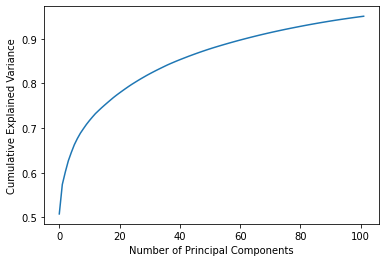

In [178]:
##5

# Plot the cumulative explained variance vs. the number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [179]:
##6

# Print the percentage of variance that is covered by the first and second PCs
print("Percentage of variance that is covered by the first PC: %", pca.explained_variance_ratio_[0]*100)
print("Percentage of variance that is covered by the second PC: %", pca.explained_variance_ratio_[1]*100)

Percentage of variance that is covered by the first PC: % 50.781172291286346
Percentage of variance that is covered by the second PC: % 6.5806802668128235


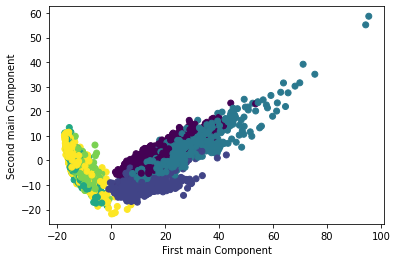

In [180]:
##7

# Transform the data to the first two main components
pca = PCA(n_components=2)
reduced = pca.fit_transform(standardized_X)

# Plot the data in the projection of the first two main components, colored according to the class labels
plt.scatter(reduced[:, 0], reduced[:, 1], c=y[0].values)
plt.xlabel("First main Component")
plt.ylabel("Second main Component")
plt.show()

In [181]:
##8

#YOUR CODE HERE

**Your explanation:**

The PCA plot of the Human Activity Recognition dataset has six clusters, each cluster represent the followings:

1. Yellow cluster: LAYING
2. Light Green cluster: STANDING
3. Dark Green cluster: SITTING
4. Light Blue cluster: WALKING_DOWNSTAIRS
5. Dark Blue cluster: WALKING_UPSTAIRS
6. Purple cluster: WALKING

- The clusters 1, 2, and 3 is not really separated well comparing to 4, 5, and 6. 

- We can see from the plot above that 4, 5, and 6 clusters are almost perfectly separated from each other.

- Overall, the clusters is kind separated well from each other.


##Task 3: Clustering

In [208]:
##9

# Make the KMeans model with 6 number of clusters & fit it
kmeans = KMeans(n_clusters=6).fit(reduced) 

# Make the Prediction 
labels = kmeans.predict(reduced)
kmeans_clusters = kmeans.labels_

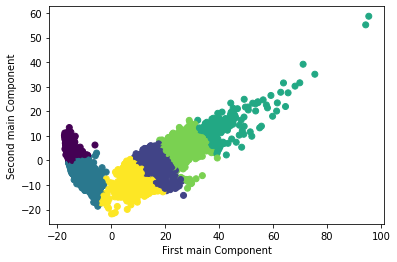

In [183]:
##10

# Plot the data in the projection of the first two main components, colored according to the class labels
plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans_clusters)
plt.xlabel("First main Component")
plt.ylabel("Second main Component")
plt.show()

Confusion Matrix: 
 [[  0   0   0   0   0   0   0]
 [639   0  28 291 268   0   0]
 [299   0   1  93 680   0   0]
 [363   0 134 393  96   0   0]
 [  0 445   0   0   9 832   0]
 [  0 615   0   0   1 758   0]
 [  0 435   0   0  22 950   0]]


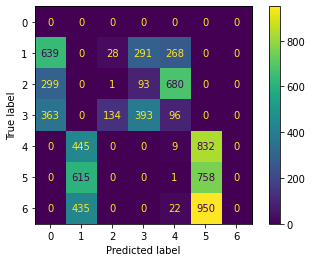

In [209]:
##11

# Compute the confusion matrix & print it
confusion_matrix = metrics.confusion_matrix(y, kmeans_clusters)
print("Confusion Matrix: \n", confusion_matrix)

# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

**Explanations:**

- We can know the activities that cannot be distinguished using Kmeans by the diagonal elements of the confusion matrix since it represents the number of instances that were correctly classified.

- We can see that the activities number 1 and 6 could not be distinguished using the Kmeans at all.

- Activities 2 and 4 could be distinguished using the Kmeans but with really low value of number of instances that were correctly classified.

- Activities 3 and 5 succeed to be distinguished using the Kmeans with a good values of number of instances that were correctly classified.

- Activity number 5 is the best with number of instances that were correctly classified equal to 758, while the worst is 2 with number of instances that were correctly classified equal to 1.

- The cells with the 0's value indicates that the classifier had difficulty in recognizing these particular activities.

- We can see that there is a strong relationship btween activities number 5 & 6.

In [185]:
##12

# Make the agglomerative model with 6 number of clusters, with ward linkag & fit it
agglomerative = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(reduced)
agglomerative_clusters = agglomerative.labels_

In [186]:
##13

# Make the spectral clustering model with 6 number of clusters & fit it
spectral = SpectralClustering(n_clusters=6).fit(reduced)
spectral_clusters = spectral.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [201]:
##14

algorithms = []
algorithms.append(kmeans)
algorithms.append(agglomerative)
algorithms.append(spectral)
y = np.ravel(y)

data = []
for algo in algorithms:
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(reduced, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'Silhouette'], index=['K-means', 'Agglomerative', 'Spectral'])

results

,ARI,Silhouette
K-means,0.268749,0.473929
Agglomerative,0.265695,0.456565
Spectral,0.000662,0.587198


**Comparisons of clustering results:**

- K-means algorithm has the best performance in the ARI since its value is the highest value that it is close to 1. 

- For the Silhouette, we can see that the Spectral has the best value which tells that it has a strong similarity.

- Overall, the best clustering algorithm based on the above result is Agglomerative since it has the highest ARI value and good Silhouette value.

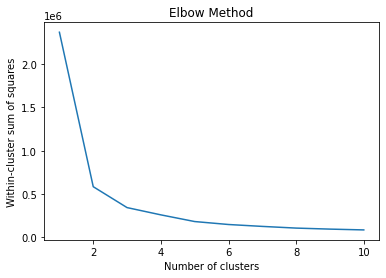

In [206]:
##15

# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Loop through different values of K (1 to 10)
for k in range(1, 11):
    # Fit the K-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(reduced)
    # Append the within-cluster sum of squares for the current value of K
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()